In [ ]:
# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), 
# then give an example of what a true positive, true negative, type I and type II errors would look like. Note 
# that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more 
# precise questions that could be tested.



In [ ]:
#     Has the network latency gone up since we switched internet service providers?

# H0 = The network latency has not changed since switching ISPs
# HA = The network latency has increased since switching ISPs (i.e. the internet is slower)

# True positive: We reject H0 in favor of HA AND HA is true 
# -- We conclude internet has gotten slower AND it has actually gotten slower

# True negative: We fail to reject the H0 AND H0 is true 
# -- We conclude the internet is the same speed AND it is actually the same speed

# Type I error is a false positive: H0 is true, but we reject it in favor of HA 
# -- we conclude the internet is slower, but actually it is not slower

# Type II error is a false negative: We fail to reject H0, but actually HA is true 
# -- We conclude internet speed has not changed, BUT actually it has changed

In [ ]:
#     Is the website redesign any good?

# H0 = website redesign has had no change in usefulness. We'll measure in terms of number of page visits 
# HA = website redesign has increasead in usefulness (num of page visits has increased) -- (Do we need to declare an amount for the increase?)

# True Pos: We reject H0 in favor of HA AND HA is true (number of page visits has increased)

# True Neg: We fail to reject H0 AND H0 is true (number of page visits hasn't changed)

# Type I Error (False Positive): We reject H0 in favor of HA, but H0 is true
#  -- We falsely conclude the number of page visits has increased

# Type II Error (False Negative): We fail to reject H0 when HA is true
#  -- We falsely conclude there is not an increase in page visits, when actually there is an increase

In [ ]:
#     Is our television ad driving more sales?

# H0 = the tv ad has had no impact on sales
# HA = the tv ad has increased sales


# True Pos: We reject H0 in favor of HA AND HA is true
# -- We conclude the ad has increased sales AND the ad has increased sales
# -- ACTUALLY: can we determine causality?

# True Neg: We fail to reject H0 AND H0 is true
# -- We conclude sales have not increased AND they actually have not increased

# Type I Error (False Positive): We reject H0 in favor of HA, but H0 is true
# -- We conclude sales have increased, BUT actually they have not increased

# Type II Error (False Negative): We fail to reject H0 when HA is true
# -- We conclude sales have not increased BUT actually they have increased

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)

In [37]:
# Answer with the type of test you would use (assume normal distribution):

#     Is there a difference in grades of students on the second floor compared to grades of all students?
# Answer: One-Sample, two-tail t-test because we comparing a group that is within the larger group

#     Are adults who drink milk taller than adults who dont drink milk?
# Answer: Independent one-tail t-test (aka 2-sample, one-tail t-test) because we have two groups 
#         that do not overlap with each other

#     Is the the price of gas higher in texas or in new mexico?
# Answer: Independent, one-tail t-test (aka 2-sample, one-tail t-test) because we have two groups 
#         that do not overlap with each other

#     Are there differences in stress levels between students who take data science vs students who take 
# web development vs students who take cloud academy?
# Answer: Analysis of Variance aka ANOVA because we have more than 2 groups and we are trying to determine
#         if there are differences between the groups. By definition, two-tail, since ANOVA can't test for >, <



In [ ]:
# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
# A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 
# 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of 
# significance.

In [39]:
# two-sample, two-tail test

# Step 1: Plot distributions via histogram
#  First make the distributions

office1_days_dist = stats.norm(90, 15)
office2_days_dist = stats.norm(100, 20)

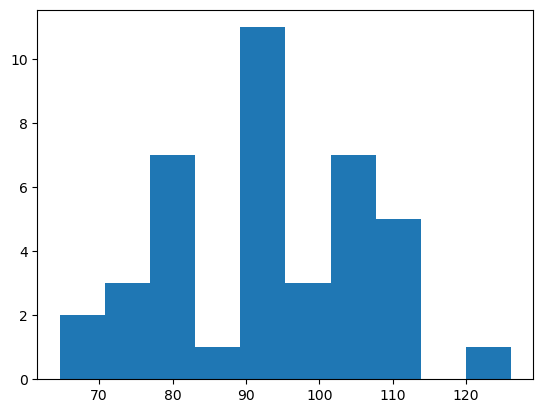

13.533809744258884

In [45]:
office1_sim = office1_days_dist.rvs(40)
plt.hist(office1_sim)
plt.show()
office1_sim.std()

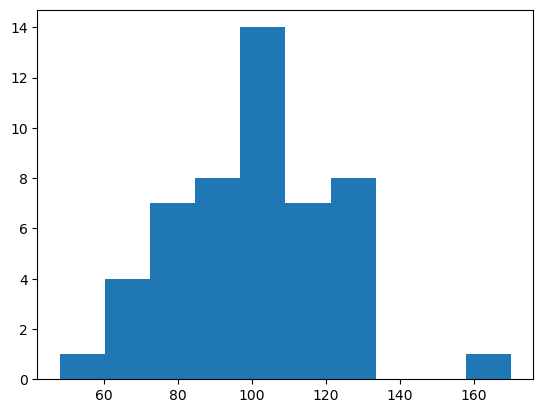

In [46]:
office2_sim = office2_days_dist.rvs(50)
plt.hist(office2_sim)
plt.show()

In [ ]:
# Step 2: Establish Hypothesis:
# H0: There is NO difference in the average number of days it takes to sell a home between office 1 and office 2
# Ha: There IS a difference (so this is a 2 tailed test; later we will test for p<alpha)

In [47]:
# Step 3: Set alpha = .05
alpha = .05

In [48]:
# Step 4: Verify assumptions:
# Independence - Yes because the data points / distributions come from two different groups
# Normal distributioin? - Yes because the question said so, and I created normal dist's via stats.norm
# Equal variances? use stats.levene
s, p = stats.levene(office1_sim, office2_sim)
s, p
# p is < alpha so variances are NOT equal. So we set equal_var = False in the next step
# Also
# print(office1_sim.var())
# print(office2_sim.var())

(5.471134861103068, 0.021598090765881893)

In [49]:
# Step 5: Compute test statistic and probability (t-statistic & p-value) using stats.ttest_ind
t, p = stats.ttest_ind(office1_sim, office2_sim, equal_var=False)
t, p

(-2.2906102740428533, 0.024495039592841668)

In [50]:
if p < alpha:
    print("There IS a difference between the average number of days it takes to sell a house between office 1 and 2.")
else:
    print("There is NO difference between the avg num of days it takes to sell a house btwn office 1 and 2.")

There IS a difference between the average number of days it takes to sell a house between office 1 and 2.


In [21]:
# Load the mpg dataset and use it to answer the following questions:

from pydataset import data
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<AxesSubplot:>

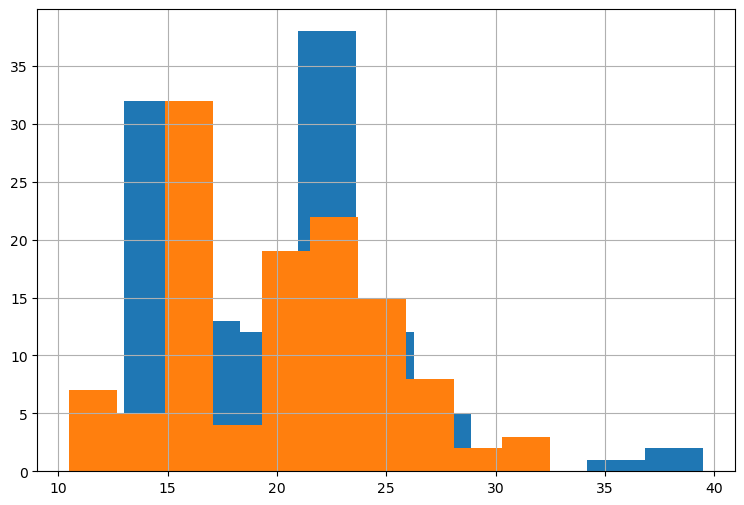

In [52]:
#     Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

# Since we're comparing two different groups, I will use the stats.ttest_ind, aka 2-sample, 2-tail t-test
# Step 1: Plot distributions via histogram
# First capture data into two arrays (_1999 and _2008) where each element is the average of cty and hwy
# for all cars with model years 1999 and 2008, respectively.

fuel_eff_1999 = (df[df.year==1999].cty + df[df.year==1999].hwy) / 2
fuel_eff_2008 = (df[df.year==2008].cty + df[df.year==2008].hwy) / 2

plt.figure(figsize=(9,6))
fuel_eff_1999.hist()
fuel_eff_2008.hist()
# sns.histplot(fuel_eff_1999)
# sns.histplot(fuel_eff_2008)
# plt.show()
# fuel_eff_1999.mean(), fuel_eff_2008.mean()

In [32]:
# step 2: Establish hypothesis:
# H0: There is NO difference between fuel efficiency of cars from 1999 and cars from 2008
# Ha: There IS a difference (two-tail test, so just testing for p<alpha)

# step 3: Set alpha = .05
alpha = .05

In [34]:
# step 4: verify assumptions (ind, normal, equal variance)
# indepence? - Yes. one group's data points do not depend on the other group(?)
# normal? - Yes because we have > 30 data points in each group (117 in both grps to be precise)
# variance? - Use stats.levene
s, p = stats.levene(fuel_eff_1999, fuel_eff_2008)
s, p
# p is .8555... which is > alpha of .05, so the two distributions have "equal" variances

(0.033228136671080453, 0.855517569468803)

In [54]:
# step 5: Compute t-statistic and p value
t, p = stats.ttest_ind(fuel_eff_1999, fuel_eff_2008)
t, p
# p is .82637... which is > alpha, so we fail to reject H0

(0.21960177245940962, 0.8263744040323578)

In [55]:
# step 6, make a decision
# p is .82637... which is > alpha, so we fail to reject H0

if p < alpha:
    print("There IS a difference between the fuel efficiency of cars made in 1999 and 2008.")
else:
    print("There is NO significant difference between the fuel efficiency of cars made in 1999 and 2008.")


There is NO significant difference between the fuel efficiency of cars made in 1999 and 2008.


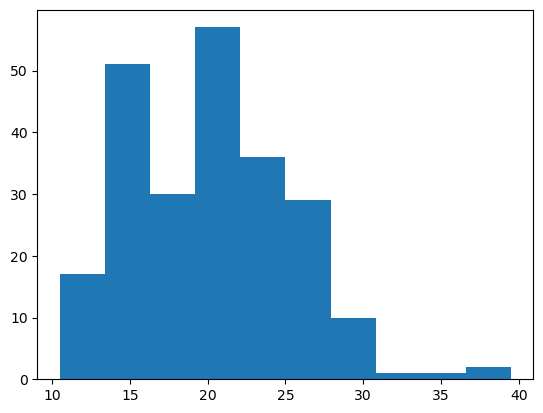

In [50]:
####     Are compact cars more fuel-efficient than the average car?

# Since we're comparing one group that is within the larger group I'll use stats.ttest_1samp 
# aka One-sample t-test, AND it will be a 1 tail test
# Step 1: Plot distributions via histograms:

fuel_eff_compact = (df[df['class']=='compact'].cty + df[df['class']=='compact'].hwy) / 2
fuel_eff_overall = (df.cty + df.hwy) / 2

plt.hist(fuel_eff_overall)
plt.show()

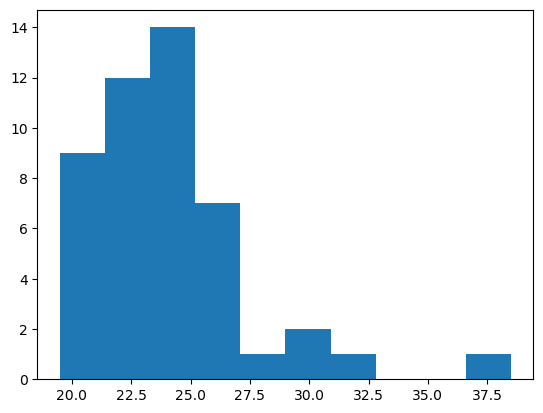

In [51]:
plt.hist(fuel_eff_compact)
plt.show()

In [52]:
# Step 2: Establish Hypothesis
# H0 - Fuel eff of compact cars is <= fuel eff of all cars
# Ha - Fuel eff. of compact cars is > fuel eff of all cars

# Step 3: Set significance level, alpha = .05
alpha = .05

In [53]:
# Step 4: Verify assumptions: normal or >= 30 observations
fuel_eff_compact.shape
# We have 47 observations for compact and way more than 47 for all cars, so YES we pass the normal assumption

(47,)

In [54]:
# Step 5: Compute test statistics
t, p = stats.ttest_1samp(fuel_eff_compact, fuel_eff_overall.mean())
t, p

(7.896888573132533, 4.1985637943171486e-10)

In [74]:
# step 6, make a decision
# p is 4.198...e-10 which is < alpha, so we reject H0

if (p/2 < alpha) and (t > 0):
    print("The fuel efficiency of compact cars is greater than the fuel eff. of all cars.")
else:
    print("The fuel efficiency of compact cars is less than or equal to the fuel eff. of all cars.")

The fuel efficiency of compact cars is greater than the fuel eff. of all cars.


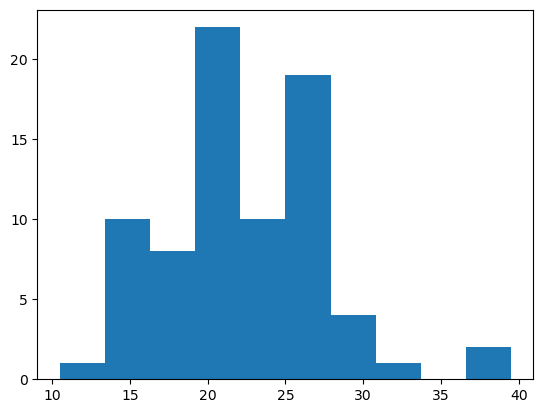

In [57]:
#     Do manual cars get better gas mileage than automatic cars?

# I'll use a Independent t-test aka a 2-sample, 1-tail t-test since we have two distinct groups
# Step 1, plot distributions via histograms

fuel_eff_man = (df[df.trans.str.contains('man')].cty + df[df.trans.str.contains('man')].hwy) / 2
fuel_eff_auto = (df[df.trans.str.contains('auto')].cty + df[df.trans.str.contains('auto')].hwy) / 2

plt.hist(fuel_eff_man)
plt.show()

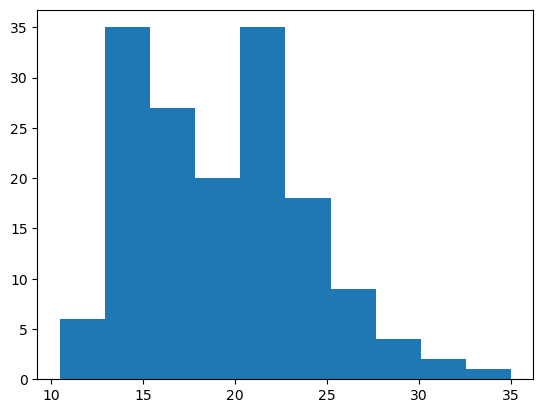

In [58]:
plt.hist(fuel_eff_auto)
plt.show()

In [59]:
# Step 2: Establish hypothesis
# H0: Fuel eff of manuals is <= automatics
# Ha: Fuel eff of manuals is > automatics

# Step 3: Set alpha = .05
alpha = .05

In [60]:
# Step 4: Verify assumptions: Independence, normal dist, equal variances
# Independence? Yes, each data point does not depend on any other data point
# Normal: We have >= 30 data points (77 for man, 157 for auto)
fuel_eff_man.shape, fuel_eff_auto.shape

((77,), (157,))

In [61]:
# Equal Variance? - use stats.levene
s, p = stats.levene(fuel_eff_man, fuel_eff_auto)
s, p
# p is .6545... which is > alpha of .05, so Equal Variance

(0.20075824847529639, 0.6545276355131857)

In [62]:
# Step 5: Compute statistics via ttest_ind
t, p = stats.ttest_ind(fuel_eff_man, fuel_eff_auto)
t, p

(4.593437735750014, 7.154374401145685e-06)

In [73]:
# Step 6: Make Decision
# since p/2 is < alpha and t is > 0, we can reject H0 in favor of Ha

if (p/2 < alpha) and (t > 0):
    print("Manuals have greater fuel efficiency than automatics.")
else:
    print("Manuals do NOT have greater fuel efficiency than automatics")

Manuals have greater fuel efficiency than automatics.


In [2]:
############ Correlation Exercises #################

In [ ]:
#     Answer with the type of stats test you would use (assume normal distribution):

#         Is there a relationship between the length of your arm and the length of your foot?
# Answer: 2 x continuous variables; testing for relationship:  stats.pearsonr

#         Do guys and gals quit their jobs at the same rate?
# Answer: 2 groups and we want to compare means:  2-sample, probably 2-tail t-test: stats.ttest_ind

#         Does the length of time of the lecture correlate with a students grade?
# Answer: 2 x continuous variables; testing for linear relationship: stats.pearsonr

In [173]:
#     Use the telco_churn data.
#         Does tenure correlate with monthly charges?
#         Total charges?
#         What happens if you control for phone and internet service?

from env import host, user, password
def get_db_url(db_name, user=user, host=host, password=password):
    '''
    get_db_url accepts a database name, username, hostname, password 
    and returns a url connection string formatted to work with codeup's 
    sql database.
    Default values from env.py are provided for user, host, and password.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

connection_str = get_db_url('telco_churn')
query = """
            SELECT * 
            FROM customers
            JOIN customer_churn USING (customer_id)
            JOIN internet_service_types USING (internet_service_type_id)
        """
df = pd.read_sql(query, connection_str)

In [174]:

df.total_charges = df.total_charges.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1869 entries, 0 to 1868
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  1869 non-null   int64  
 1   customer_id               1869 non-null   object 
 2   gender                    1869 non-null   object 
 3   senior_citizen            1869 non-null   int64  
 4   partner                   1869 non-null   object 
 5   dependents                1869 non-null   object 
 6   tenure                    1869 non-null   int64  
 7   phone_service             1869 non-null   object 
 8   multiple_lines            1869 non-null   object 
 9   online_security           1869 non-null   object 
 10  online_backup             1869 non-null   object 
 11  device_protection         1869 non-null   object 
 12  tech_support              1869 non-null   object 
 13  streaming_tv              1869 non-null   object 
 14  streamin

In [7]:
# Does tenure correlate with monthly charges?

# Step 1: What test?  2 x cont. var's; assume normal dist; testing for correlation: stats.pearsonr

# Step 2: Setup
# H0: There is NO linear relationship between tenure and monthly charges
# Ha: There IS a linear relationship between tenure and monthly charges
alpha = .05


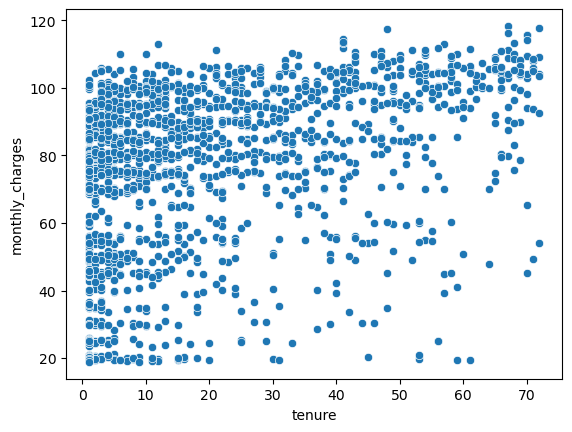

In [9]:
# Step 3: Visualize

sns.scatterplot(data = df, x='tenure', y = 'monthly_charges') 
plt.show()

In [10]:
# Step 4: calculate statistic
r, p = stats.pearsonr(df.tenure, df.monthly_charges)
print ('r = ', r)
print ('p = ', p)

r =  0.401285600132126
p =  3.0121978116585465e-73


In [175]:
# Step 5: Conclude
# Since p > alpha, we could normally reject the H0. However, the r value is < .5. 
# so ... the relationship isn't really strong enough to conclude that there is a relationship

# Turns out the data was NOT normally distributed, so I should have used spearmanr

r, p = stats.spearmanr(df.tenure, df.monthly_charges)
r, p

(0.4843751919531249, 1.5136016239109236e-110)

In [ ]:


##### Does tenure correlate with total charges?  (makes sense that this would be true, but let's see)

# Step 0: look at data. I missed some blanks in the total charges column (should have used sort_values to see)

# Step 1: Which test:  same logic: stats.pearsonr
## Also missed the fact that the data was not normally distributed. CLT could account for it since we have
# tons of data points, but also could use spearmanr
# Step 2: Setup
# H0: There is NO linear relationship between tenure and total charges
# Ha: There IS a linear relationship between tenure and total charges
alpha = .05

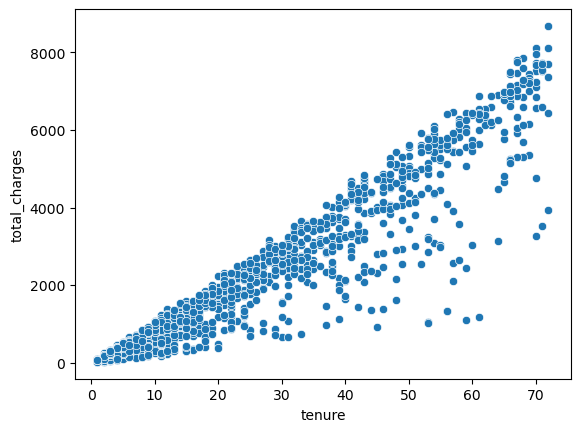

In [27]:
#Step 3: Visualize

sns.scatterplot(data = df, x='tenure', y = 'total_charges')
plt.show()

In [30]:
# Step 4: calculate statistic
r, p = stats.pearsonr(df.tenure, df.total_charges)
print ('r = ', r)
print ('p = ', p)

r =  0.9540174529269912
p =  0.0


In [ ]:
# Step 5: Since r is near 1.0 and p is so low that python rounded it to zero (i.e. < alpha),
# We can reject the H0 which suggests Ha, that there is a correlation between tenure and total_charges

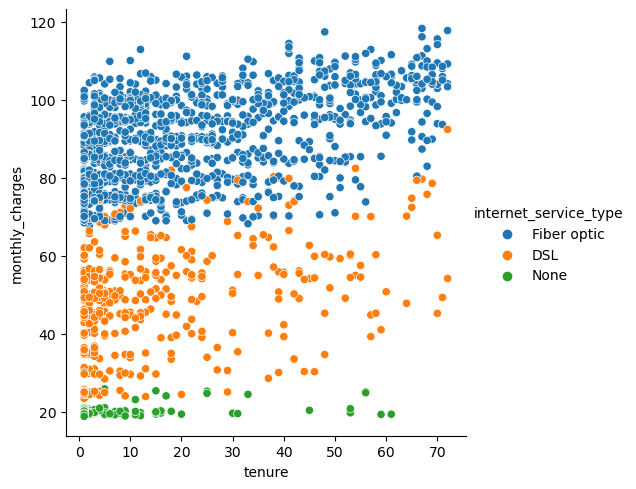

In [45]:
# What happens if we control for phone and internet service
# So, I'll assume this means what if we control for phone and internet services in the first question
# which was asking about a correlation between tenure and monthly charges

# Steps: 1-stats.pearsonr, 2-H0 No correlation;Ha IS correlation
# Step 3: Visualize

sns.relplot(data = df, x='tenure', y = 'monthly_charges', hue='internet_service_type')
plt.show()

In [48]:
# Step 4: compute the statistics with stats.pearsonr

# First, separate the df into three dfs that only include each internet service type, respectively

df.internet_service_type.value_counts()

fiber_df = df[df.internet_service_type=='Fiber optic']
dsl_df = df[df.internet_service_type=='DSL']
no_intrnt_df = df[df.internet_service_type=='None']

r1, p1 = stats.pearsonr(fiber_df.tenure, fiber_df.monthly_charges)
r2, p2 = stats.pearsonr(dsl_df.tenure, dsl_df.monthly_charges)
r3, p3 = stats.pearsonr(no_intrnt_df.tenure, no_intrnt_df.monthly_charges)

print ('Fiber Optic, r1 = ', r1,'  p1 = ', p1)
print ('DSL,         r2 = ', r2,'  p2 = ', p2)
print ('No Int Svc   r3 = ', r3,'  p3 = ', p3)

Fiber Optic, r1 =  0.5617768241671829   p1 =  9.15068955780366e-109
DSL,         r2 =  0.38666446185787784   p2 =  8.10342380165284e-18
No Int Svc   r3 =  0.3208031459048997   p3 =  0.0005316096608913472


In [ ]:
# Step 5: Conclude
# Well, each internet service type had positive r values, but only Fiber Optic had a positive r value > .5.
# All p values were well below .05
# So this suggests there is a linear relationship between tenure and monthly_charges for Fiber Optic Int Svc Type

# Just thinking out loud.  This may not tell us much of anything except that the company raises its monthly
# charges over time.  As one does.  It's not helping with churn (maybe I'll look at that later.)

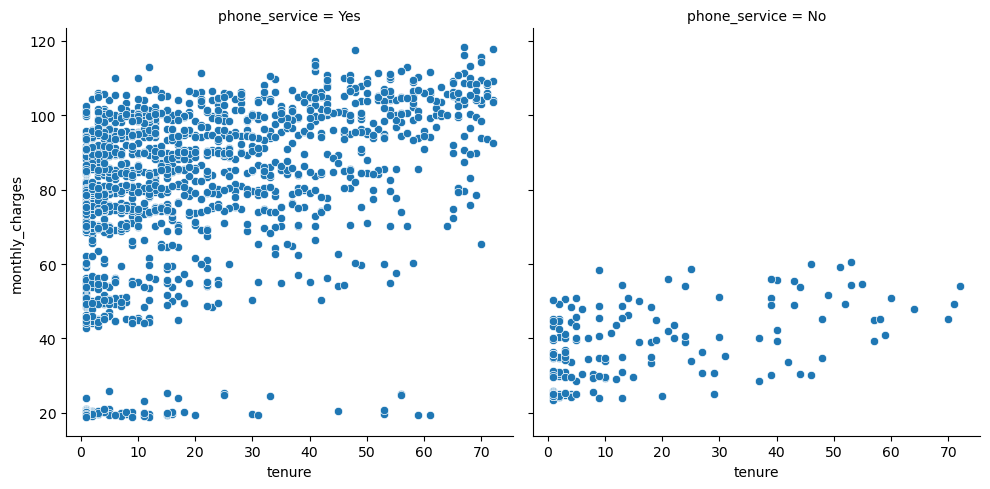

In [50]:
###### Next I'll control for phone type when comparing tenure and monthly charges #######

# Steps: 1-stats.pearsonr, 2-H0 No correlation;Ha IS correlation
# Step 3: Visualize

sns.relplot(data = df, x='tenure', y = 'monthly_charges', col='phone_service')
plt.show()

In [51]:
# Step 4, compute statistic
# First separate df by phone service

hasphone_df = df[df.phone_service=='Yes']
nophone_df = df[df.phone_service=='No']

r1, p1 = stats.pearsonr(hasphone_df.tenure, hasphone_df.monthly_charges)
r1, p1 = stats.pearsonr(nophone_df.tenure, nophone_df.monthly_charges)

print ('Has phone service, r1 = ', r1,'  p1 = ', p1)
print ('No phone service,  r2 = ', r2,'  p2 = ', p2)

Has phone service, r1 =  0.5150841620064206   p1 =  6.646811756682243e-13
No phone service,  r2 =  0.38666446185787784   p2 =  8.10342380165284e-18


In [ ]:
# Step 5, Conclude
# The r value for the hasphone_df is > .5 with a p1 < .05 (alpha), so we can reject the H0 that there is no 
# relationship between tenure and monthly charges in the group of customers that have phone service
# This suggests there IS a correlation between tenure and monthly_charges for customers w/ phone service

In [52]:
###### New Question, new database #######

#     Use the employees database.
#         Is there a relationship between how long an employee has been with the company and their salary?
#         Is there a relationship between how long an employee has been with the company and the number of 
#             titles they have had?


In [57]:
# # First up, comparing length of time with company vs. current salary
# This query takes several minutes, FYI

from env import host, user, password
connection_str = get_db_url('employees')
query = """
            SELECT emp_no, hire_date, salary, from_date, to_date
            FROM employees
            JOIN salaries USING (emp_no)
        """
emp_salary_df = pd.read_sql(query, connection_str)

In [65]:
emp_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844047 entries, 0 to 2844046
Data columns (total 5 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   emp_no     int64 
 1   hire_date  object
 2   salary     int64 
 3   from_date  object
 4   to_date    object
dtypes: int64(2), object(3)
memory usage: 108.5+ MB


In [147]:
# The following lines of code create a new column named tenure
# tenure is the number of days you get when you hire_date from to_date
# First though, if to_date is 9999-01-01, I make it now (ex, 2023-04-11)

# group the dataframe by emp_no by the max of to_date. 
new_df = pd.DataFrame(emp_salary_df.groupby('emp_no').to_date.max())
new_df.head()

,to_date
emp_no,
10001,9999-01-01
10002,9999-01-01
10003,9999-01-01
10004,9999-01-01
10005,9999-01-01


In [148]:
# then merge it back with the sql pull to get the current salaries
new_df = new_df.merge(emp_salary_df, how = 'inner', on=['emp_no', 'to_date'])

In [149]:
# i found datetime out there to help me test for 9999-01-01 and to add in today's date

import datetime as dt
future = new_df['to_date'].iloc[0]
now = dt.date(year = 2023, month = 4, day = 11)


In [150]:
# make a new series that I will modify and put back into the new_df

new_to_date_series = new_df.to_date
new_new_td_series = pd.Series([now if x == future else x for x in new_to_date_series])

In [153]:
# put the new series back into the data frame and set the tenure 
# column by subtracting hire_date from to_date
# NOW, I have two continuous variables to compare: tenure and current salary
new_df['to_date'] = new_new_td_series
new_df['tenure'] = new_df.to_date - new_df.hire_date
new_df.head()

,emp_no,to_date,hire_date,salary,from_date,tenure
0,10001,2023-04-11,1986-06-26,88958,2002-06-22,13438 days
1,10002,2023-04-11,1985-11-21,72527,2001-08-02,13655 days
2,10003,2023-04-11,1986-08-28,43311,2001-12-01,13375 days
3,10004,2023-04-11,1986-12-01,74057,2001-11-27,13280 days
4,10005,2023-04-11,1989-09-12,94692,2001-09-09,12264 days


In [164]:
new_df['tenure'] = new_df['tenure'].dt.days

In [166]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300180 entries, 0 to 300179
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     300180 non-null  int64 
 1   to_date    300180 non-null  object
 2   hire_date  300180 non-null  object
 3   salary     300180 non-null  int64 
 4   from_date  300180 non-null  object
 5   tenure     300180 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 24.1+ MB


In [ ]:
# Step 1: Test will be a stats.pearsonr
# Step 2: Setup
# H0 = There is NO correlation between salary and tenure
# Ha = There IS a correlation

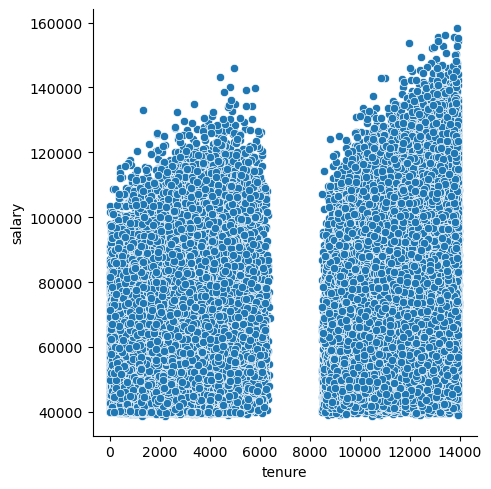

In [167]:
# Step 3 Visualize
sns.relplot(data = new_df, x='tenure', y = 'salary')
plt.show()

In [168]:
# That was weird because there is a hole in the data between about 65000 and 82000 days of tenure.
# I'm going to press for now, but something probably isn't right
# Turns out, this data stops in the early 2000's. If I would have used the max(to_date) that wasn't 9999-01-01,
# it would have made more sense.

# Step 4 Compute statistic
r, p = stats.pearsonr(new_df.tenure, new_df.salary)
r, p

(0.32033815326314163, 0.0)

In [ ]:
# Step 5 Conclude
# r is ~.32 which is < .5. Since p is very low (< .05), I can reject the H0 
# and say there is a weak positive correlation between tenure and salary

In [ ]:
#         Is there a relationship between how long an employee has been with the company and the number of 
#             titles they have had?

In [169]:
# I need a dataframe with emp_no and number of titles to add back into my new_df that has tenure

from env import host, user, password
connection_str = get_db_url('employees')
query = """
            SELECT emp_no, COUNT(title) as cnt_title
            FROM employees
            JOIN titles USING (emp_no)
            GROUP BY emp_no
        """
emp_title_df = pd.read_sql(query, connection_str)

In [171]:
# merge emp_title_df back into new_df
new_df = new_df.merge(emp_title_df, how = 'inner', on=['emp_no'])
new_df.head()

,emp_no,to_date,hire_date,salary,from_date,tenure,cnt_title
0,10001,2023-04-11,1986-06-26,88958,2002-06-22,13438,1
1,10002,2023-04-11,1985-11-21,72527,2001-08-02,13655,1
2,10003,2023-04-11,1986-08-28,43311,2001-12-01,13375,1
3,10004,2023-04-11,1986-12-01,74057,2001-11-27,13280,2
4,10005,2023-04-11,1989-09-12,94692,2001-09-09,12264,2


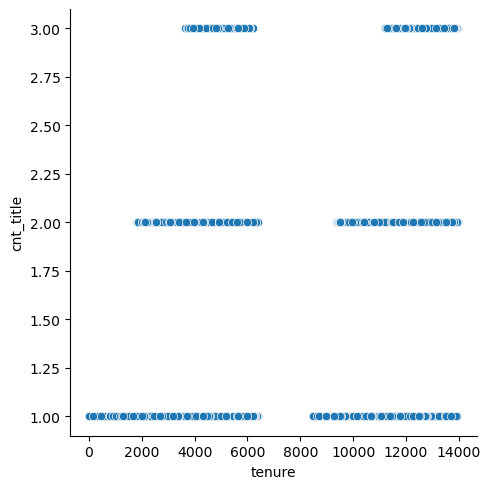

In [176]:
sns.relplot(data = new_df, x='tenure', y = 'cnt_title')
plt.show()
# Since cnt_title is a discrete variable, we should not use anything that requires continuous variables
# So we should use something like ANOVA / Kruskal Wallis
# do the levene test, turns out you don't have equal variance, so we are forced into Kruskal Wallis

# H0: The median salary is the same for the various number of titles
# Ha: The median salary is NOT equal

# ... more plots and kruskal wallis:  We reject the H0

In [ ]:
###### New Question, new database #######


#     Use the sleepstudy data.
#         Is there a relationship between days and reaction time?

In [177]:
from pydataset import data
df = data('sleepstudy')

In [178]:
# H0 There is no relationship between days and reaction time
# Ha There IS a relationship

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [180]:
react_df = df[['Reaction','Days']]
react_df.head()
react_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


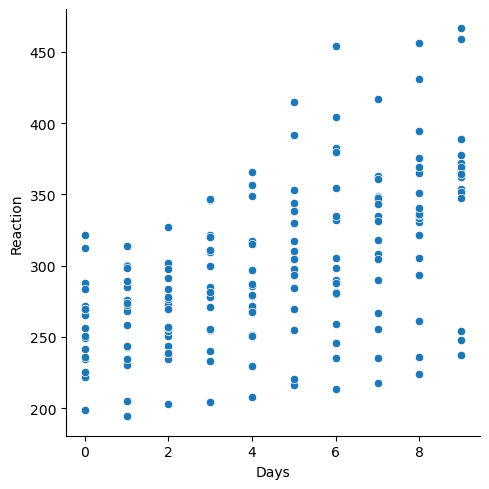

In [181]:
sns.relplot(data = df, x='Days', y = 'Reaction')
plt.show()

In [183]:
# Discrete (days) - so ANOVA?  Let's try spearman since the number of "categories", i.e days is so large, i.e. 10
# and the distributions are not normal

r, p = stats.spearmanr(df.Days, df.Reaction)
r, p

(0.5228138502259547, 5.132878057706873e-14)

In [ ]:
# Conclude: p is low and r is positive and > .5 => correlation yes